#### Machine Learning Avançado

#### Conteúdo - Bases e Notebook da aula

https://github.com/FIAP/Pos_Tech_DTAT/tree/Machine-Learning-Avan%C3%A7ado

#### Dicionário de Dados --> Aula 2

| Nome Original | Nome da Coluna (Sugerido) | Tipo de Dado | Descrição |
| :--- | :--- | :--- | :--- |
| **sl_no** | Nº de Série | Numérico (Inteiro) | Número de identificação sequencial único para cada candidato. |
| **gender** | Gênero | Categórico (Texto) | Gênero do candidato (ex: 'M' para Masculino, 'F' para Feminino). |
| **ssc_p** | Nota - Ensino Secundário | Numérico (Decimal) | Percentual de notas do candidato no Certificado de Escola Secundária (10º ano). |
| **ssc_b** | Conselho - Ensino Secundário | Categórico (Texto) | Conselho de educação em que o Ensino Secundário foi concluído (ex: 'Central', 'Others'). |
| **hsc_p** | Nota - Ensino Médio | Numérico (Decimal) | Percentual de notas do candidato no Certificado de Escola Secundária Superior (12º ano). |
| **hsc_b** | Conselho - Ensino Médio | Categórico (Texto) | Conselho de educação em que o Ensino Médio foi concluído. |
| **hsc_s** | Área - Ensino Médio | Categórico (Texto) | Área de estudo ou especialização no Ensino Médio (ex: 'Commerce', 'Science', 'Arts'). |
| **degree_p**| Nota - Graduação | Numérico (Decimal) | Percentual de notas do candidato na graduação. |
| **degree_t**| Área - Graduação | Categórico (Texto) | Área de estudo ou tipo de graduação (ex: 'Sci&Tech', 'Comm&Mgmt', 'Others'). |
| **workex** | Experiência de Trabalho | Categórico (Texto) | Indica se o candidato possui experiência de trabalho prévia ('Yes' ou 'No'). |
| **etest_p**| Nota - Teste de Empregabilidade | Numérico (Decimal) | Percentual de notas do candidato em um teste de empregabilidade. |
| **specialisation**| Especialização - MBA | Categórico (Texto) | Área de especialização do MBA (ex: 'Mkt&HR' para Marketing e RH, 'Mkt&Fin' para Marketing e Finanças). |
| **mba_p** | Nota - MBA | Numérico (Decimal) | Percentual de notas do candidato no MBA. |
| **status** | Status da Contratação | Categórico (Texto) | Status final do candidato no processo de recrutamento (ex: 'Placed' para contratado, 'Not Placed' para não contratado). |
| **salary** | Salário | Numérico (Decimal) | Salário oferecido ao candidato, caso tenha sido contratado ('Placed'). Pode conter valores nulos para os não contratados. |

#### Importação de pacotes, bibliotecas e funções (def)

In [1]:
# Evitar o vazamento de memoria
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Importar biblioteca completa
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import plotly_express as px
import matplotlib as colors


# Importar função especifica de um módulo
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN

In [3]:
"""

Exemplo

-- Gerar o wcss
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k, n_init=10)
  model = model.fit(iris)
  wcss.append(model.inertia_)

df_wcss = pd.DataFrame({
    'Número de Clusters': range(1, 11),
    'WCSS': wcss
})

df_wcss.head(11)

-- Definir melhor numero de clusters
n = optimal_number_of_clusters(wcss)
print(n)

"""

# Apoio
# Como definir o número de clusters para o seu KMeans
# https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

#### Aula 1 - Modelos de Classificação

In [4]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
link = "https://github.com/FIAP/Pos_Tech_DTAT/raw/073d3c7ab0cd105f8ad2fb347c0f02cb36773ee4/Aula%2001/Base%20de%20dados/gaf_esp.xlsx"
dados = pd.read_excel(link, engine= "calamine")

In [5]:
# Ver os primeiro dados 
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [6]:
# Ver os ultimos dados 
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


In [7]:
# Ver a estatistica descritiva da base 

dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [8]:
# Ver a qtd da base 

dados.shape

(100, 3)

In [9]:
# Agrupar os dados

dados.groupby("Espécie").describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

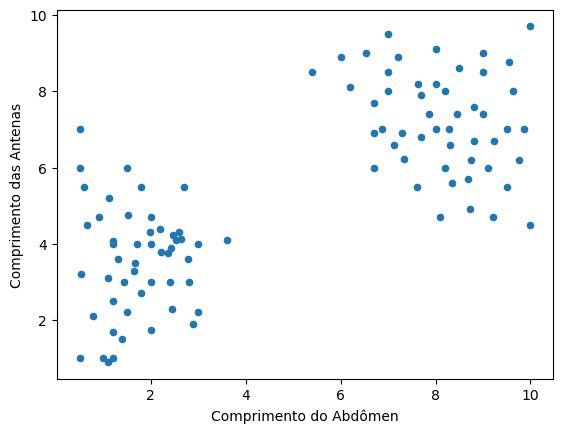

In [10]:
# Criar grafico de dispersão 

dados.plot.scatter(x = "Comprimento do Abdômen", y = "Comprimento das Antenas")
plt.show()

In [11]:
# Selecionar as variaveis caracteristica 

x = dados[["Comprimento do Abdômen","Comprimento das Antenas"]] # --> dois colchete pois estamos selecionando mais de uma coluna
x.head()

,Comprimento do Abdômen,Comprimento das Antenas
0,0.50,7.0
1,0.50,6.0
2,0.60,5.5
3,0.65,4.5
4,0.54,3.2


In [12]:
# Selecionar a variavel target

y = dados["Espécie"]
y.head()

0    Gafanhoto
1    Gafanhoto
2    Gafanhoto
3    Gafanhoto
4    Gafanhoto
Name: Espécie, dtype: object

In [13]:
# Separar os dados entre treino e teste 
# test_size    --> tamanho da base de teste  
# random_state --> é a semente da aleatoriedade 
# exemplo sem usar o stratify

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

qtd_gafanhoto = list(y_train).count("Gafanhoto")
qtd_esperanca = list(y_train).count("Esperança")
qtd = len(y_train)

print(f"Qtd de dados no y_train para Gafanhoto: {qtd_gafanhoto} --> {(qtd_gafanhoto/qtd) * 100:.2f} %")
print(f"Qtd de dados no y_train para Esperança: {qtd_esperanca} --> {(qtd_esperanca/qtd) * 100:.2f} %")

Qtd de dados no y_train para Gafanhoto: 38 --> 47.50 %
Qtd de dados no y_train para Esperança: 42 --> 52.50 %


In [14]:
"""

A Semente da Reprodutibilidade: Desvendando o `random_state=42` em Machine Learning

Ao se aventurar no universo do Machine Learning, é comum se deparar com o parâmetro `random_state` em diversas funções, sendo um dos exemplos mais clássicos o seu 
uso na divisão de dados de treino e teste com a função `train_test_split` da biblioteca Scikit-learn, frequentemente com o valor `42`. Mas, afinal, o que significa essa "semente de aleatoriedade" 
e por que ela é tão importante?

Em essência, a **semente de aleatoriedade (random seed)** é um ponto de partida para um gerador de números pseudoaleatórios. Computadores, por sua natureza determinística, não conseguem gerar 
números verdadeiramente aleatórios. Em vez disso, eles utilizam algoritmos para criar sequências de números que aparentam ser aleatórias. A semente é o valor inicial que alimenta esse algoritmo.

Isso significa que, ao fornecer a mesma semente para o gerador, ele produzirá sempre a mesma sequência de números "aleatórios". É aqui que reside a importância do `random_state` em 
Machine Learning: **garantir a reprodutibilidade dos resultados.**

### O Papel do `random_state` no `train_test_split`

A função `train_test_split` é fundamental para dividir um conjunto de dados em duas partes: uma para treinar o modelo e outra para testar sua performance em dados não vistos.
Essa divisão é feita de forma aleatória para garantir que ambos os conjuntos sejam representativos da totalidade dos dados.

Ao definir `random_state` com um valor inteiro, como `42`, estamos fixando a "aleatoriedade" dessa divisão. Em outras palavras, toda vez que o código for executado com `random_state=42`, a exata 
mesma separação entre dados de treino e teste será realizada. As mesmas linhas do seu conjunto de dados original serão alocadas para o conjunto de treino e as mesmas para o de teste, sempre.

Se o parâmetro `random_state` não for definido (ou for `None`), a cada execução a divisão dos dados será diferente, pois o sistema utilizará uma semente aleatória diferente, geralmente baseada no tempo do sistema.

### Por que a Reprodutibilidade é Crucial?

A capacidade de reproduzir experimentos é um pilar da ciência, e no Machine Learning não é diferente. A utilização do `random_state` oferece diversas vantagens:

* **Colaboração e Depuração:** Ao compartilhar seu código com outros pesquisadores ou colegas, o uso de uma semente de aleatoriedade garante que eles consigam replicar seus resultados exatamente. 
Isso facilita a depuração de problemas e a validação de suas conclusões.
* **Comparação Justa de Modelos:** Ao experimentar diferentes algoritmos ou ajustar os hiperparâmetros de um modelo, é essencial que a comparação seja feita nas mesmas condições. Fixar o `random_state` 
garante que a única variável sendo alterada é o próprio modelo, e não a forma como os dados foram divididos, permitindo uma avaliação justa e precisa do desempenho.
* **Consistência em Tutoriais e Publicações:** Em materiais educacionais e artigos científicos, o `random_state` é utilizado para que os leitores possam seguir os passos e obter os mesmos resultados apresentados, 
facilitando o aprendizado e a verificação.

### E por que o número 42?

A escolha do número `42` como valor para a semente de aleatoriedade é, na verdade, uma convenção e uma referência cultural popular na comunidade de tecnologia e ciência de dados. 
O número vem do livro de ficção científica "O Guia do Mochileiro das Galáxias", de Douglas Adams, onde `42` é a resposta para "a questão fundamental da vida, o universo e tudo mais".

Qualquer outro número inteiro poderia ser utilizado como semente (`0`, `123`, `2024`, etc.) e o efeito seria o mesmo: a garantia de reprodutibilidade. 
O uso do `42` é simplesmente um aceno divertido a essa obra icônica.

Em resumo, o `random_state=42` no `train_test_split` não é um parâmetro misterioso, mas sim uma ferramenta poderosa para assegurar que seus experimentos de Machine Learning sejam consistentes, 
verificáveis e comparáveis, trazendo mais rigor científico para o seu trabalho.

"""

# Separar os dados entre treino e teste 
# test_size    --> tamanho da base de teste  
# stratify     --> equilibrio na separação 
# random_state --> é a semente da aleatoriedade 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

qtd_gafanhoto = list(y_train).count("Gafanhoto")
qtd_esperanca = list(y_train).count("Esperança")
qtd = len(y_train)

print(f"Qtd de dados no y_train para Gafanhoto: {qtd_gafanhoto} --> {(qtd_gafanhoto/qtd) * 100:.2f} %")
print(f"Qtd de dados no y_train para Esperança: {qtd_esperanca} --> {(qtd_esperanca/qtd) * 100:.2f} %")


Qtd de dados no y_train para Gafanhoto: 40 --> 50.00 %
Qtd de dados no y_train para Esperança: 40 --> 50.00 %


In [15]:
# Exemplo de numeros aleatorios com semente
np.random.seed(42)
np.random.randint(low=1,high=10,size=10)

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4])

In [16]:
# Exemplo de numeros aleatorios sem semente
np.random.randint(low=1,high=10,size=10)

array([8, 8, 3, 6, 5, 2, 8, 6, 2, 5])

In [17]:
# Criar o modelo KNN --> -Nearest Neighbors, ou K Vizinhos Mais Próximos
modelo_classificador = KNeighborsClassifier(n_neighbors=3) # --> n_neighbors é um hiperparemetro

In [18]:
# Treinar (fit) o modelo
modelo_classificador.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
# Realizar as previsões
# modelo_classificador.predict([[8,6]]) --> Essa forma gera um warnings

# Dessa forma não gera o warnings
modelo_classificador.predict(pd.DataFrame([[8,6]], columns=["Comprimento do Abdômen", "Comprimento das Antenas"]))

array(['Esperança'], dtype=object)

In [20]:
# Verificar a acuracidade
y_predito = modelo_classificador.predict(x_test)

In [21]:
# Verificar a acuracidade
accuracy_score(y_true=y_test, y_pred=y_predito)

1.0

#### Aula 2 - KNN, SVM

In [22]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
link = "https://github.com/FIAP/Pos_Tech_DTAT/raw/073d3c7ab0cd105f8ad2fb347c0f02cb36773ee4/Aula%2002/Base%20de%20Dados/Recrutamento.xlsx"
dados = pd.read_excel(link, engine= "calamine")

In [23]:
# Consultar os dados
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [24]:
# Campo/Coluna Status é o nosso target 
# Ver o conteudo de uma coluna 
set(dados.status)

{'No', 'Yes'}

In [25]:
# Ver o estatistica basica/descritiva 
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [26]:
# Ver os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [27]:
# Outra maneira de ver os dados
dados.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

<Axes: >

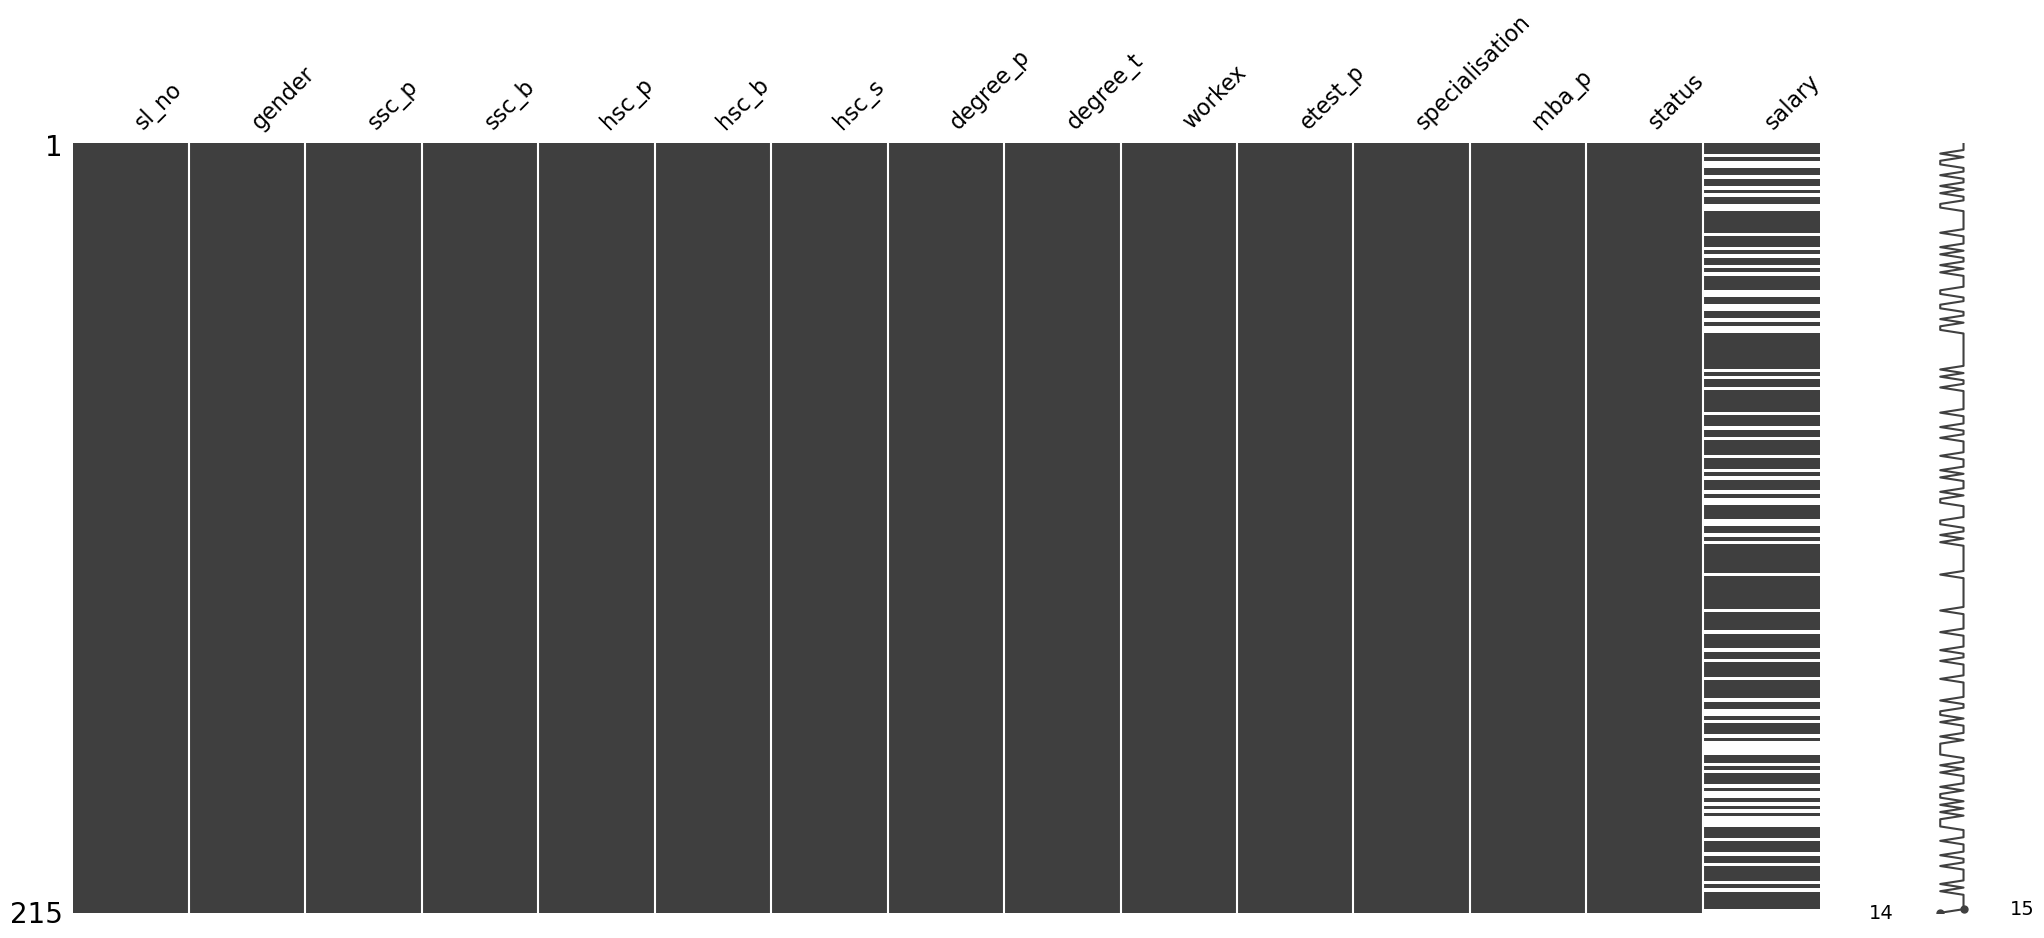

In [28]:
# Ver de forma visual dados faltantes

msno.matrix(dados)

In [29]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

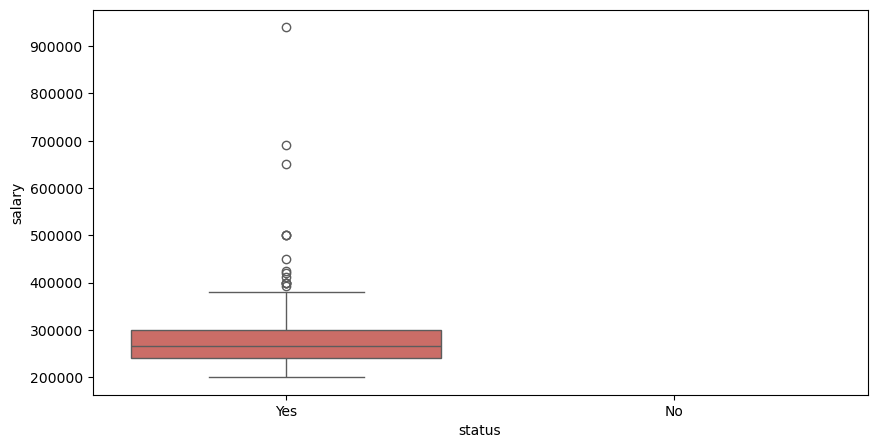

In [30]:
# Plotar um grafico do tipo box plot 

plt.figure(figsize=(10,5))
sns.boxplot(x="status", y="salary", data = dados, palette="hls", hue = "status")
plt.show()

In [31]:
# Tratar dados nulos 

dados["salary"] = dados["salary"].fillna(value=0) # --> Preencher com 0 onde esta vazio 

In [32]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

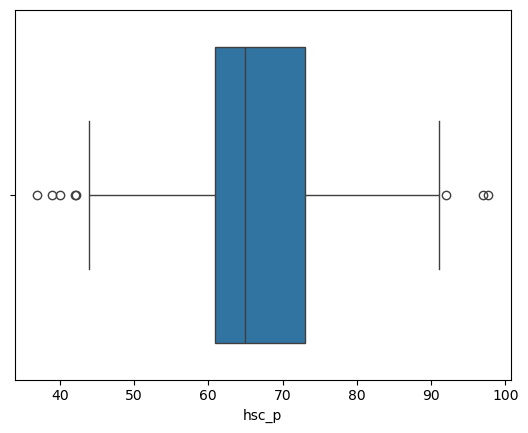

In [33]:
sns.boxplot(x=dados["hsc_p"]) # --> Boxplot no horizontal 
plt.show()

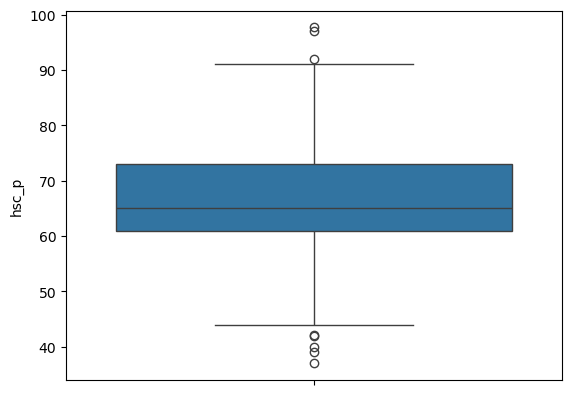

In [34]:
sns.boxplot(y=dados["hsc_p"]) # --> Boxplot no vertical
plt.show()

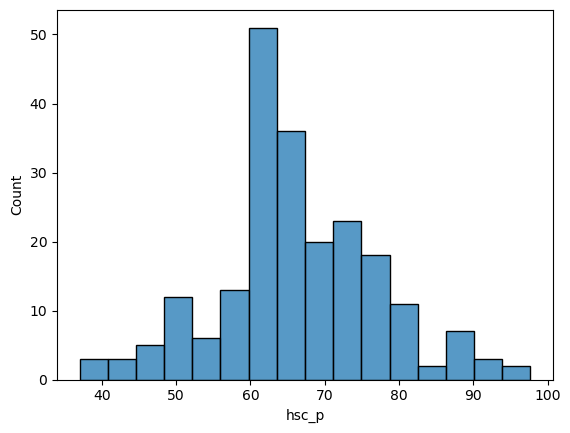

In [35]:
# Plotar o histograma

sns.histplot(data = dados, x="hsc_p")
plt.show()

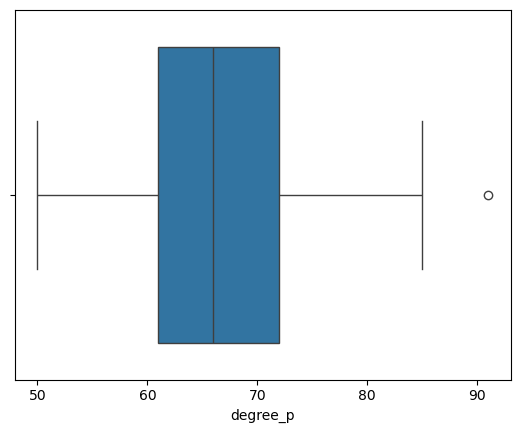

In [36]:
sns.boxplot(x=dados["degree_p"])
plt.show()

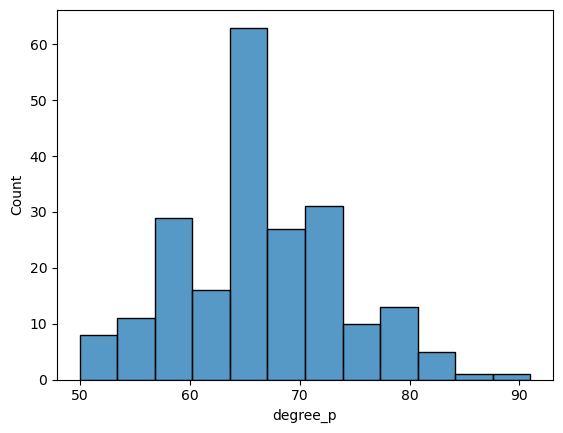

In [37]:
sns.histplot(data = dados, x="degree_p")
plt.show()

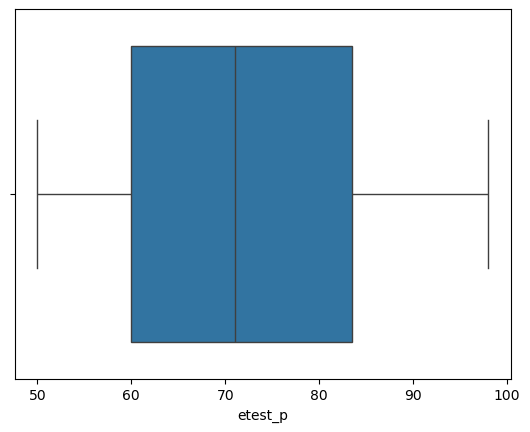

In [38]:
sns.boxplot(x=dados["etest_p"])
plt.show()

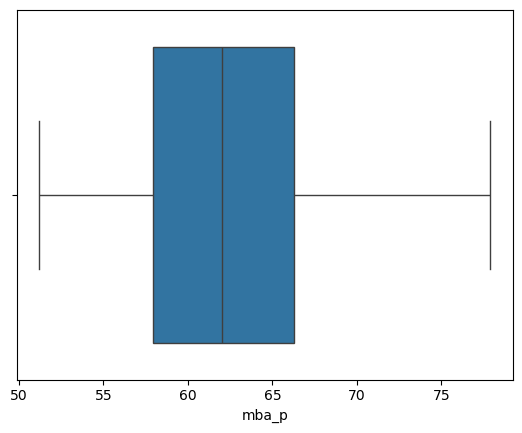

In [39]:
sns.boxplot(x=dados["mba_p"])
plt.show()

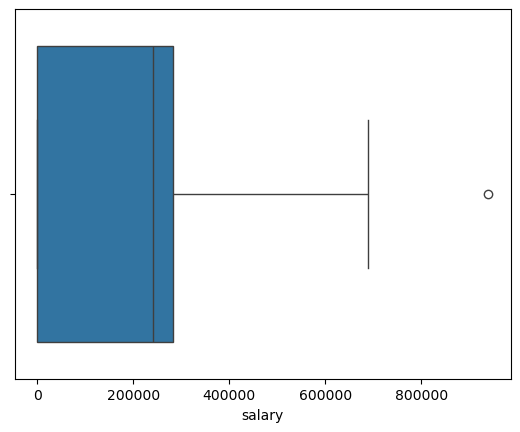

In [40]:
sns.boxplot(x=dados["salary"])
plt.show()

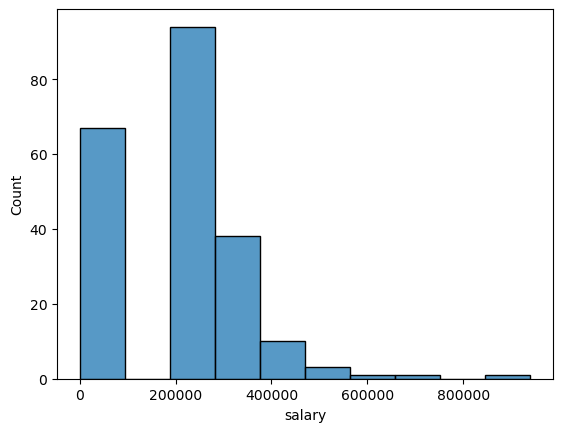

In [41]:
sns.histplot(data = dados, x="salary")
plt.show()

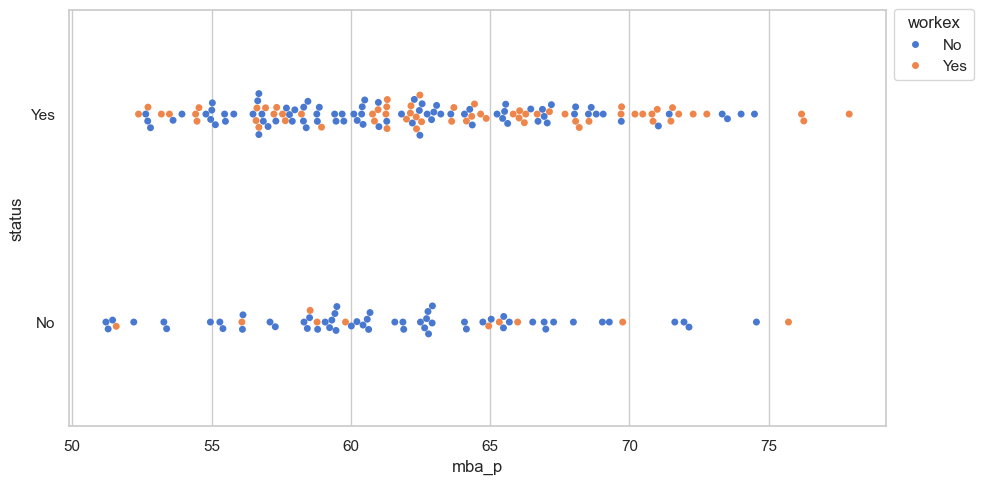

In [42]:
# Plotar grafico Swarmplot
sns.set_theme(style="whitegrid", palette="muted") # --> configurar tema

plt.figure(figsize=(10,5))
ax = sns.swarmplot(data=dados, x="mba_p", y="status", hue="workex") #--> hue é a separação dos dados
#ax.set(ylabel="mba_p")

plt.legend(title="workex", bbox_to_anchor=(1, 1.02), loc='upper left') # legenda fora
plt.tight_layout() 

plt.show()

In [43]:
# Plotar o grafico Violin da biblioteca plotly-express
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")

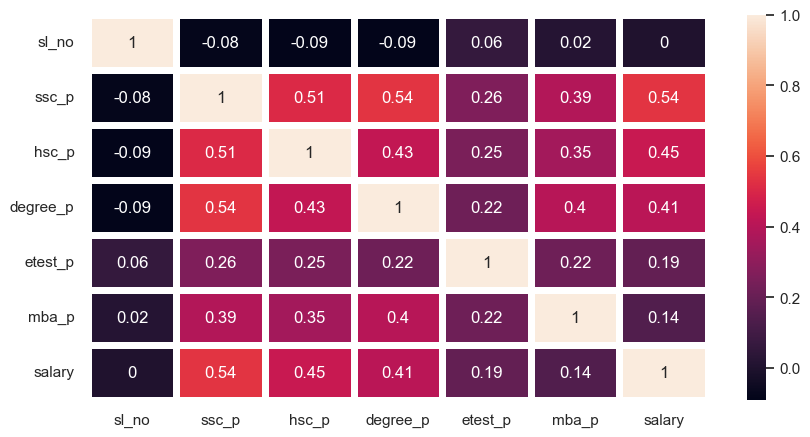

In [44]:
# Criar uma matriz de correlação
correlation_matriz = dados.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

In [45]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [46]:
# Transformar os dados categoricos
# LabelEncoder altera a coluna atual

colunas = ["gender", "workex", "specialisation", "status"]

Label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = Label_encoder.fit_transform(dados[col])

dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [47]:
# One-Hot Encoding
dummy_hsc_s = pd.get_dummies(dados["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dados["degree_t"], prefix="dummy")

dados_dummy = pd.concat([dados,dummy_hsc_s,dummy_degree_t], axis=1)

dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,False,True,False,True,False,False


In [48]:
# Dropar tabelas 
dados_dummy.drop(["hsc_s","degree_t","salary"],axis=1,inplace=True)
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


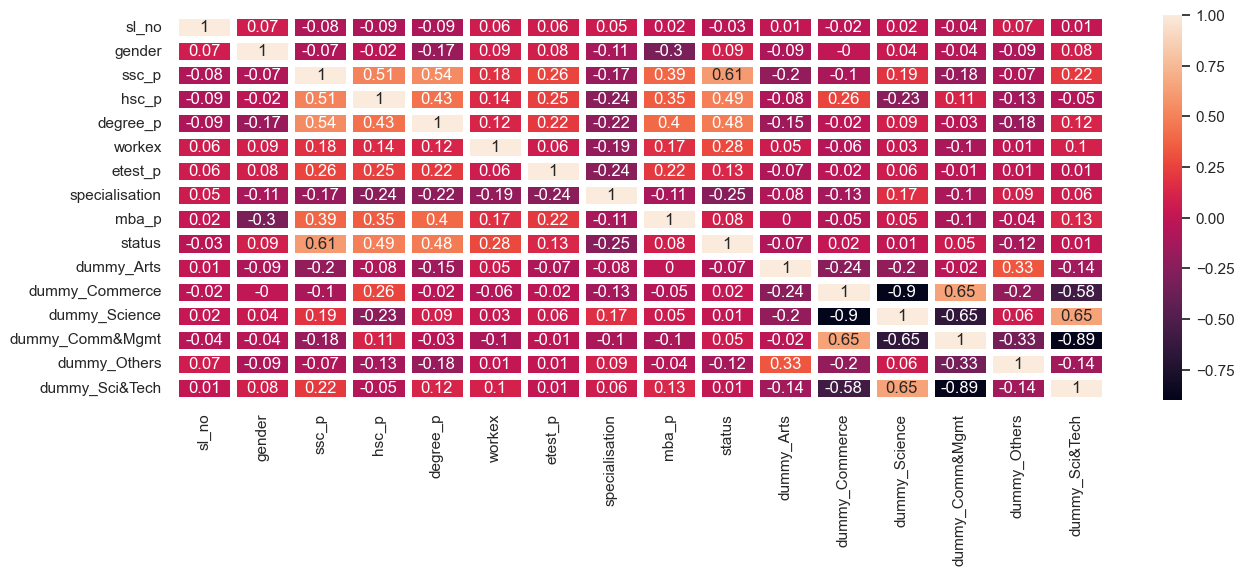

In [49]:
# Criar uma matriz de correlação
correlation_matriz = dados_dummy.select_dtypes(include=['number','boolean']).corr().round(2)

fig, ax = plt.subplots(figsize=(15,5))

sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

In [50]:
# Separar os dados 

x = dados_dummy[["ssc_p","hsc_p","degree_p","workex","mba_p"]]
y = dados_dummy["status"]

In [51]:
# Separar os dados em treino e teste 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=7)

In [52]:
x_train.shape

(172, 5)

In [53]:
x_test.shape

(43, 5)

In [54]:
# Verificar a escala dos dados
x.head()

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50


In [55]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [56]:
x_train_escalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

In [57]:
# Definir o k do n_neighbors

error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))

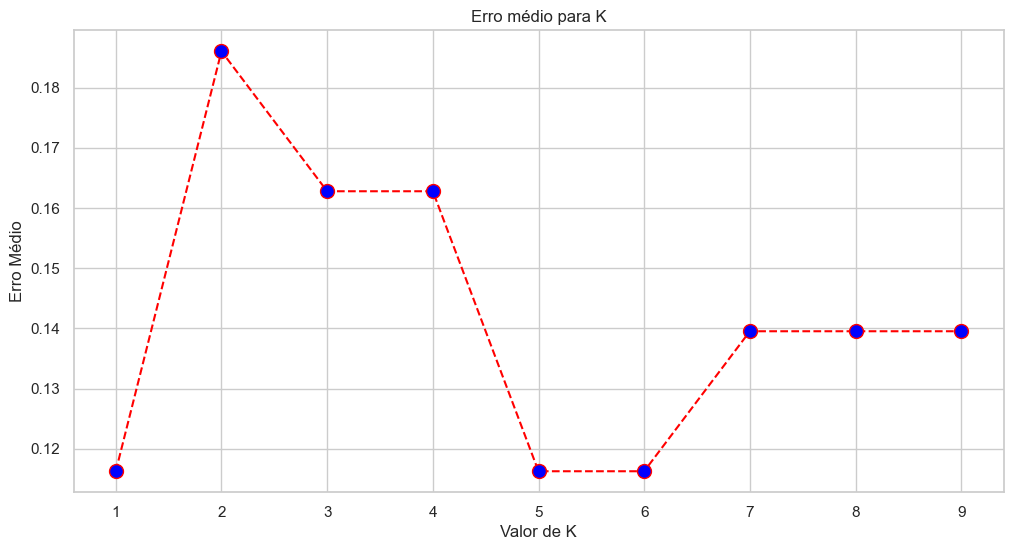

In [58]:
# Plotar o grafico --> Melhor K é o menor valor e sempre o valor impar

plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color = "red", linestyle = 'dashed', marker= "o", markerfacecolor="blue", markersize=10)
plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro Médio")

plt.show()

In [59]:
# Treinar e prever o modelo - KNN

modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [60]:
print(accuracy_score(y_test,y_predito))

0.8837209302325582


In [61]:
# Usar o modelo svm

svm = Pipeline(

    [

        ("linear_svc",LinearSVC(C=1))

    ]

)

In [62]:
svm.fit(x_train_escalonado,y_train)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [63]:
y_predito_svm = svm.predict(x_test_escalonado)

In [64]:
print(accuracy_score(y_test,y_predito_svm))

0.8604651162790697


In [65]:
accuracy_score_knn = accuracy_score(y_test,y_predito)
accuracy_score_svm = accuracy_score(y_test,y_predito_svm)

print("Resultado dos modelos")
print(f"Modelo KNN: {accuracy_score_knn* 100:.2f} %")
print(f"Modelo KNN: {accuracy_score_svm* 100:.2f} %")

Resultado dos modelos
Modelo KNN: 88.37 %
Modelo KNN: 86.05 %


#### Aula 3 - Kmeans

In [66]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
link = "https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/refs/heads/Machine-Learning-Avan%C3%A7ado/Aula%203/Base%20de%20Dados/mall.csv"
dados = pd.read_csv(link, sep=",")

In [67]:
# Ver a qtd de linhas e colunas

dados.shape

(200, 5)

In [68]:
# Ver os dados
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# Verificar se há dados null
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [70]:
# Estatistica descritiva basica
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [71]:
# Ver a mediana
dados['Annual Income (k$)'].median()

61.5

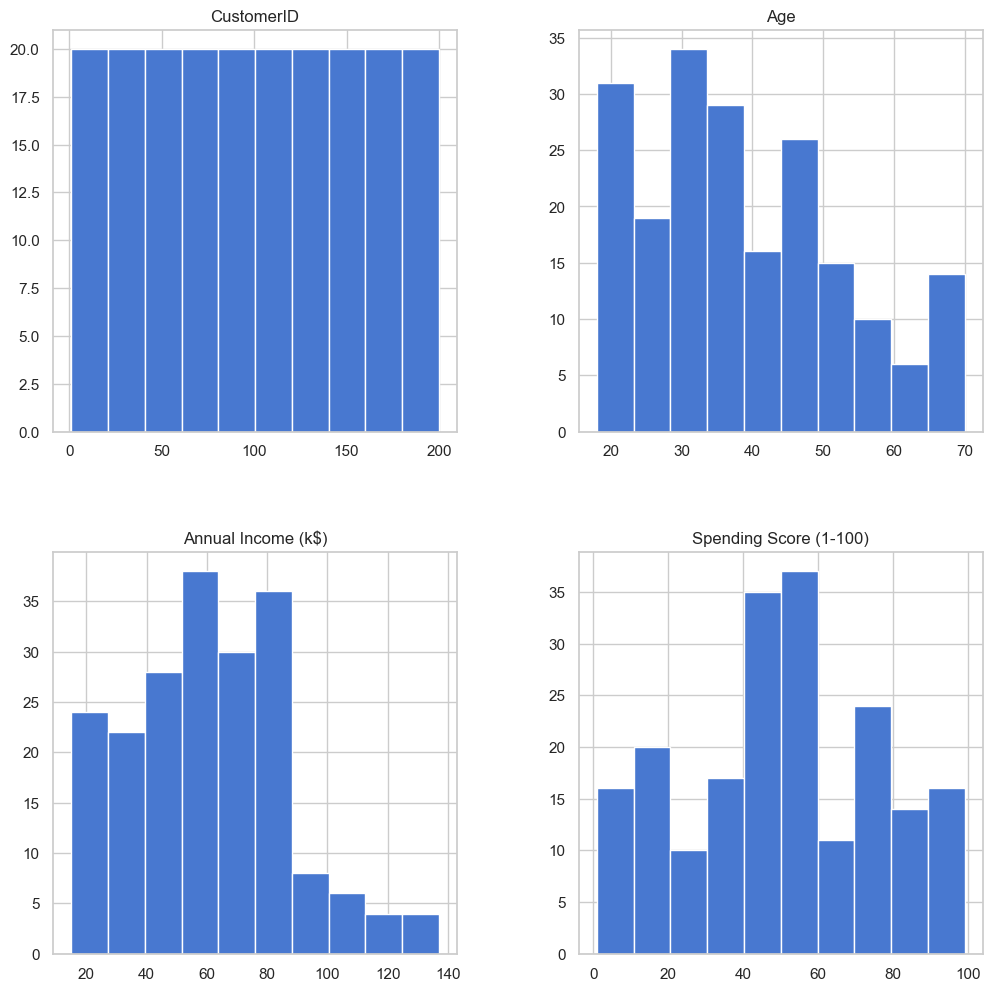

In [72]:
"""

Histograma: o que é, exemplos, gráficos e tipos
https://www.alura.com.br/artigos/o-que-e-um-histograma?srsltid=AfmBOoplYgzr9fWwV1F_tZwq06wymt_3Ay4jAK29080ErredeKXAZpzS

Na estatística, histograma e frequência são dois conceitos fundamentais e interligados que nos permitem visualizar e compreender a distribuição de um conjunto de dados. 
Em essência, um histograma é a representação gráfica de uma distribuição de frequência.

O que é Frequência?
A frequência é simplesmente a contagem de quantas vezes um determinado valor ou um grupo de valores aparece em um conjunto de dados. Existem dois tipos principais de frequência:

Frequência Absoluta: É o número exato de vezes que um valor específico ocorre. Por exemplo, se em uma sala de aula medirmos a altura de 20 alunos e 5 deles tiverem entre 1,60m e 1,65m, a frequência 
absoluta para esse intervalo de altura é 5.

Frequência Relativa: Representa a proporção ou a porcentagem de vezes que um valor ocorre em relação ao total de dados. Usando o mesmo exemplo, a frequência relativa dos 5 alunos (em um total de 20) 
seria 5/20 = 0,25 ou 25%. A frequência relativa é útil para comparar distribuições de dados com tamanhos totais diferentes.

Para organizar esses dados, geralmente criamos uma tabela de frequência, que lista os valores ou intervalos de valores (chamados de classes) e suas respectivas frequências absolutas e/ou relativas.

O que é um Histograma?
Um histograma é um tipo de gráfico de barras que ilustra visualmente uma distribuição de frequência. Diferente de um gráfico de barras comum, que compara categorias distintas, o histograma representa a 
distribuição de dados numéricos contínuos ou discretos agrupados em intervalos.

As principais características de um histograma são:

Eixo Horizontal (Eixo X): Representa os intervalos de valores (classes) dos dados. As barras são contíguas, indicando que os dados são contínuos.

Eixo Vertical (Eixo Y): Representa a frequência (absoluta ou relativa) de ocorrência de dados em cada intervalo. A altura de cada barra é proporcional à frequência daquele intervalo.

Em resumo, a altura de cada barra no histograma indica o quão "popular" é aquele intervalo de valores no conjunto de dados.

Como um Histograma é Criado e Interpretado?
A criação de um histograma geralmente segue estes passos:

Coleta de Dados: O primeiro passo é ter um conjunto de dados numéricos.

Definição dos Intervalos (Classes): Os dados são divididos em uma série de intervalos de igual amplitude. A escolha do número de intervalos é crucial, pois pode afetar a aparência do histograma e 
as conclusões tiradas.

Contagem da Frequência: Conta-se quantos pontos de dados caem em cada intervalo. Essa informação é organizada em uma tabela de frequência.

Desenho do Gráfico: Para cada intervalo, desenha-se uma barra cuja altura corresponde à sua frequência.

Ao interpretar um histograma, observamos sua forma, centro e dispersão para entender a natureza dos dados. Os formatos mais comuns de histogramas incluem:

Simétrico (ou Unimodal): Possui um pico central e as frequências diminuem de forma semelhante para ambos os lados, lembrando a forma de um sino (distribuição normal). Isso sugere que a maioria 
dos valores se concentra em torno da média.

Assimétrico à Direita (ou com cauda à direita): O pico está à esquerda e a "cauda" da distribuição se estende para a direita. Isso indica que a maioria dos dados tem valores mais baixos, 
com alguns valores altos pouco frequentes.

Assimétrico à Esquerda (ou com cauda à esquerda): O pico está à direita e a cauda se estende para a esquerda. Isso sugere que a maioria dos dados tem valores mais altos, 
com alguns valores baixos pouco frequentes.

Bimodal: Apresenta dois picos, sugerindo a presença de dois grupos distintos nos dados.

Platô (ou Retangular): As frequências são relativamente constantes em todos os intervalos, indicando uma distribuição uniforme.

"""

# Analisar a distribuicao dos valores através do histograma

dados.hist(figsize=(12,12))
plt.show()

In [73]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


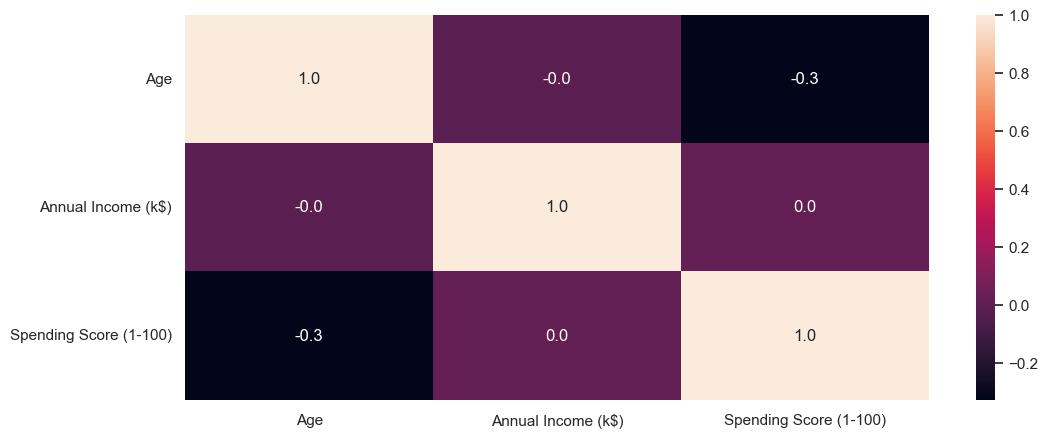

In [74]:
# Plotar o heatmap para ver a correlacao 

plt.figure(figsize=(12,5))
sns.heatmap(dados[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(method="pearson"), annot=True, fmt=".1f")
plt.show()

In [75]:
# Ver a proporção entre generos entre .value_counts()

dados["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

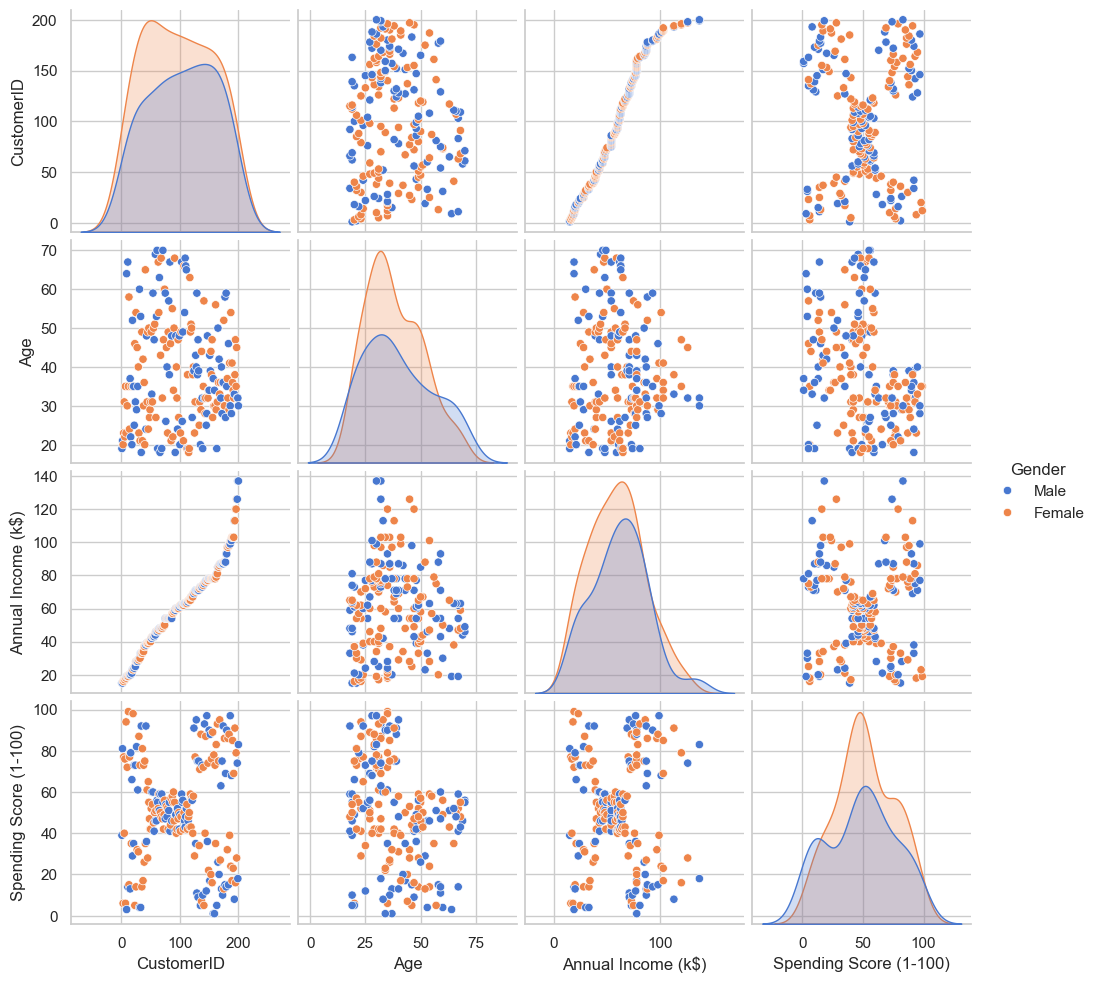

In [76]:
"""

O que é um Pairplot: Uma Ferramenta Visual para Análise de Dados
O pairplot, também conhecido como gráfico de pares, é uma poderosa ferramenta de visualização de dados utilizada em análise exploratória de dados (EDA) e aprendizado de máquina. 
Essencialmente, ele permite visualizar a relação entre múltiplas variáveis em um conjunto de dados de uma só vez, em uma única grade de gráficos. A biblioteca mais comum para criar pairplots em 
Python é a Seaborn, construída sobre o Matplotlib.

A Estrutura de um Pairplot
Um pairplot é composto por uma matriz de gráficos. A natureza do gráfico em cada célula da matriz depende da sua posição:

Gráficos na Diagonal: Ao longo da diagonal principal da matriz, o pairplot exibe a distribuição univariada de cada variável do conjunto de dados. Geralmente, essa distribuição é 
mostrada através de um histograma ou de um gráfico de densidade de kernel (KDE), que nos dá uma ideia de como os dados daquela variável específica estão distribuídos (se são simétricos, assimétricos, etc.).

Gráficos Fora da Diagonal: Nas células fora da diagonal, o pairplot apresenta a relação bivariada entre cada par de variáveis. O tipo de gráfico mais comum aqui é o gráfico de dispersão (scatter plot). 
Cada gráfico de dispersão mostra a relação entre a variável no eixo y (linha correspondente) e a variável no eixo x (coluna correspondente).

Para que Serve e Como Interpretar?
A principal utilidade do pairplot é fornecer uma visão rápida e abrangente das relações entre as variáveis numéricas de um conjunto de dados. Ao analisar um pairplot, podemos extrair insights valiosos:

Identificação de Relações Lineares: Se um gráfico de dispersão mostra pontos que se aproximam de uma linha reta, isso sugere uma correlação linear entre as duas variáveis. A direção da "nuvem" de 
pontos indica se a correlação é positiva (sobe da esquerda para a direita) ou negativa (desce da esquerda para a direita).

Detecção de Relações Não-Lineares: Nem todas as relações são lineares. Um pairplot pode revelar padrões curvos ou outras formas de relacionamento entre as variáveis.

Visualização da Distribuição de Cada Variável: Os gráficos na diagonal nos ajudam a entender a distribuição de cada variável individualmente. Isso é útil para identificar assimetrias, picos e a 
dispersão geral dos dados.

Identificação de Clusters (Agrupamentos): Em alguns casos, os gráficos de dispersão podem mostrar agrupamentos distintos de pontos. Isso pode indicar a presença de subgrupos nos seus dados.

Detecção de Outliers: Pontos de dados que estão muito distantes da maioria dos outros pontos em um gráfico de dispersão podem ser outliers (valores atípicos).

"""

# Plotar o grafico pairplot
sns.pairplot(dados, hue="Gender")
plt.show()

In [77]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


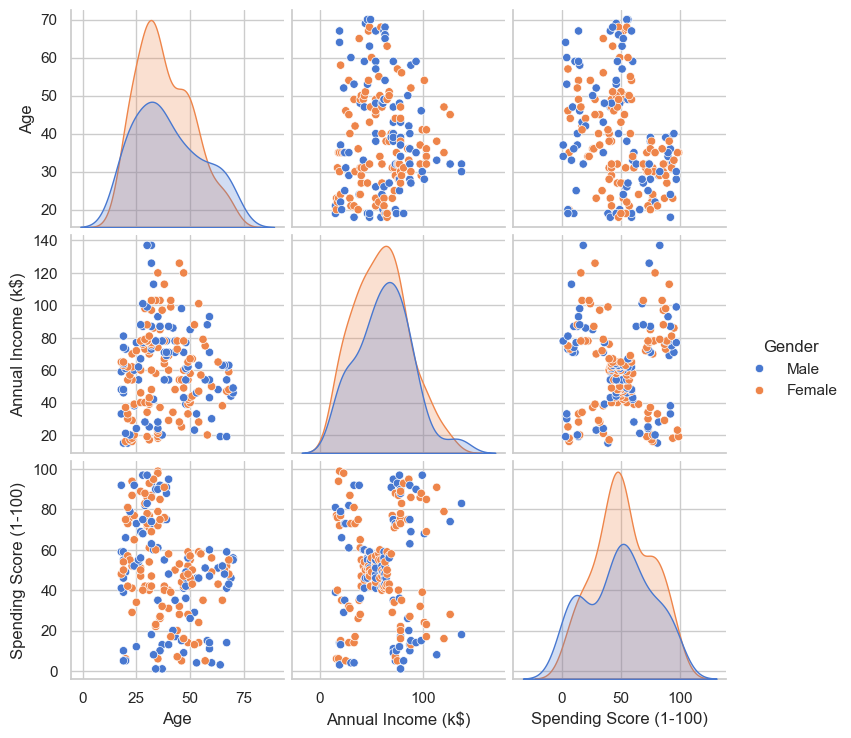

In [78]:
# Plotar o grafico pairplot --> Apenas colunas importantes 

dados_filtro = dados[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
sns.pairplot(dados_filtro, hue="Gender")
plt.show()


In [79]:
"""

StandardScaler vs. MinMaxScaler: A Batalha dos Scalers em Machine Learning
No universo do pré-processamento de dados para Machine Learning, a normalização e a padronização de features são etapas cruciais para o bom desempenho de diversos algoritmos. 
Duas das técnicas mais populares para essa finalidade são o StandardScaler e o MinMaxScaler. Embora ambos objetivem colocar as variáveis numéricas em uma escala comum,
eles operam de maneiras distintas e são adequados para diferentes cenários e modelos.

A principal diferença reside no método de transformação: o StandardScaler padroniza as features para que tenham média 0 e desvio padrão 1, enquanto o MinMaxScaler as redimensiona
para um intervalo específico, geralmente entre 0 e 1.

Como Funcionam? A Matemática por Trás da Transformação
Para entender a fundo a diferença, é essencial conhecer as fórmulas que cada um utiliza:

StandardScaler (Padronização):

O StandardScaler transforma cada valor de uma feature subtraindo a média (μ) e dividindo pelo desvio padrão (σ) do conjunto de dados de treinamento.
O resultado é uma distribuição com média 0 e desvio padrão 1. Essa técnica é também conhecida como Z-score.

MinMaxScaler (Normalização):

O MinMaxScaler, por sua vez, redimensiona os dados de forma linear para um intervalo definido, comumente [0, 1].
Onde min(X) e max(X) são, respectivamente, os valores mínimo e máximo da feature no conjunto de dados de treinamento.

O Impacto dos Outliers: Uma Diferença Crucial
A maneira como cada scaler lida com outliers é um fator determinante na escolha entre eles.

StandardScaler: Como a média e o desvio padrão são sensíveis a valores extremos, a presença de outliers pode "puxar" a média e inflar o desvio padrão. 
Isso pode resultar em dados padronizados onde a maioria dos pontos está concentrada em uma faixa estreita de valores, enquanto os outliers recebem valores Z-score muito altos ou baixos.

MinMaxScaler: É ainda mais drasticamente afetado por outliers. Se houver um outlier com um valor muito alto, ele se tornará o novo max(X). Da mesma forma, um outlier muito baixo se tornará o novo min(X). 
Isso fará com que a maioria dos outros dados, que não são outliers, seja mapeada para um intervalo muito pequeno dentro de [0, 1], perdendo sua variação relativa. 
Por exemplo, se a maioria dos dados estiver entre 10 e 100, mas houver um outlier de 1000, a maior parte dos dados será escalada para o intervalo [0, 0.09], o que pode ser prejudicial para muitos algoritmos.

Quando Usar Cada Um Deles?
A escolha entre StandardScaler e MinMaxScaler depende largamente do tipo de dados e do algoritmo de Machine Learning que será utilizado.

Use o StandardScaler quando:

O algoritmo assume que os dados estão distribuídos normalmente (ou próximo disso): Modelos como Regressão Linear, Regressão Logística e Análise de Componentes Principais (PCA) 
frequentemente se beneficiam de dados padronizados.

A variância dos dados é um fator importante: Algoritmos sensíveis à variância, como Support Vector Machines (SVMs) com kernels radiais (RBF), geralmente performam melhor com StandardScaler.

Você precisa lidar com outliers de forma que seu impacto seja reduzido, mas não totalmente eliminado: Embora sensível, o StandardScaler pode ser menos afetado por outliers do que o 
MinMaxScaler em alguns casos, pois não limita os dados a um intervalo fixo.

Use o MinMaxScaler quando:

O algoritmo não faz suposições sobre a distribuição dos dados: Algoritmos baseados em distância, como K-Nearest Neighbors (KNN), podem se beneficiar de dados em uma escala uniforme.

A magnitude das features precisa estar em uma escala pequena e específica: Redes Neurais, especialmente as camadas de entrada, frequentemente esperam valores de entrada no intervalo [0, 1] ou [-1, 1].

Você possui dados esparsos e quer preservar os zeros: O MinMaxScaler mantém os valores zero, o que pode ser importante em certos contextos, como processamento de texto (contagem de palavras).

Seu foco é a relação entre os valores e não a distribuição: Quando a posição relativa de um valor dentro do intervalo mínimo e máximo é mais importante do que sua distância em relação à média.


"""

# Normalizar os dados --> StandardScaler e MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(dados[["Annual Income (k$)","Spending Score (1-100)"]])

,copy,True
,with_mean,True
,with_std,True


In [80]:
dados_escalonados = scaler.transform(dados[["Annual Income (k$)","Spending Score (1-100)"]])

In [81]:
#dados_escalonados

In [82]:
# Modelo ML K-Means --> Diferença dele para o KNN é que ele (K-Means) não é supervizionado 

kmeans = KMeans(n_clusters=6,random_state=0, n_init=10) # Definindo os hiperparametros 

# Implementando o K-Means nos dados
kmeans.fit(dados[["Annual Income (k$)","Spending Score (1-100)"]])

# Salvando os centroides de cada cluster 
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[["Annual Income (k$)","Spending Score (1-100)"]])

In [83]:
# Modelo ML K-Means --> Diferença dele para o KNN é que ele (K-Means) não é supervizionado 

kmeans_escalonados = KMeans(n_clusters=6,random_state=0, n_init=10) # Definindo os hiperparametros 

# Implementando o K-Means nos dados
kmeans.fit(dados_escalonados)

# Salvando os centroides de cada cluster 
centroides_escalonados = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonados = kmeans.predict(dados_escalonados)

In [84]:
# Gerar o data frame dos dados escalonados
dados_escalonados = pd.DataFrame(dados_escalonados, columns=["Annual Income (k$)","Spending Score (1-100)"])

In [85]:
# Ver os dados
dados_escalonados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [86]:
dados_escalonados["Grupos"] = kmeans_labels_escalonados
dados_escalonados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,0


In [87]:
dados["Grupos"] = kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


In [88]:
pd.Series(kmeans_labels).value_counts()

3    81
2    35
1    28
5    23
0    22
4    11
Name: count, dtype: int64

In [89]:
centroides

array([[ 25.72727273,  79.36363636],
       [ 78.03571429,  81.89285714],
       [ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 26.30434783,  20.91304348]])

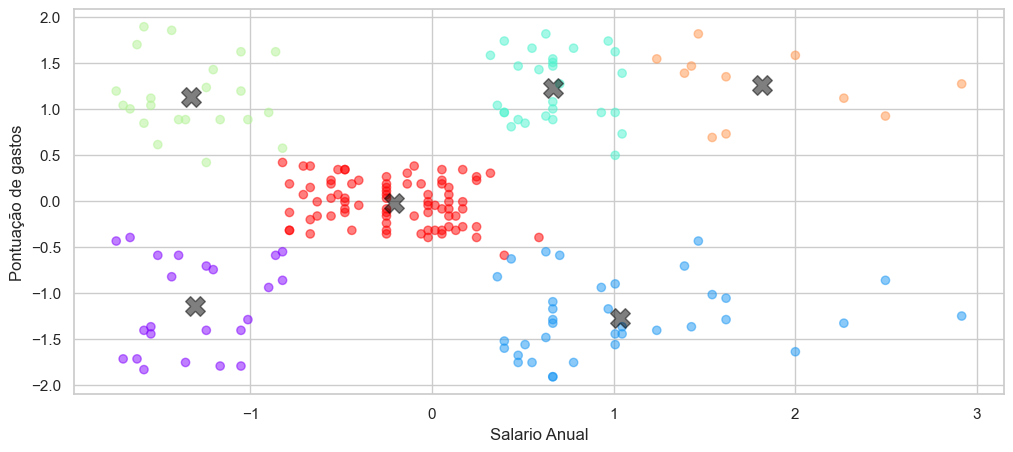

In [107]:
# Plotar os os grupos com dados escalonados

plt.scatter(dados_escalonados["Annual Income (k$)"],dados_escalonados["Spending Score (1-100)"],c=kmeans_labels_escalonados, alpha=0.5, cmap="rainbow")
plt.xlabel("Salario Anual")
plt.ylabel("Pontuação de gastos")

plt.scatter(centroides_escalonados[:,0],centroides_escalonados[:,1],c="black",marker="X",s=200,alpha=0.5)
plt.rcParams['figure.figsize'] = (12,5)
plt.show()


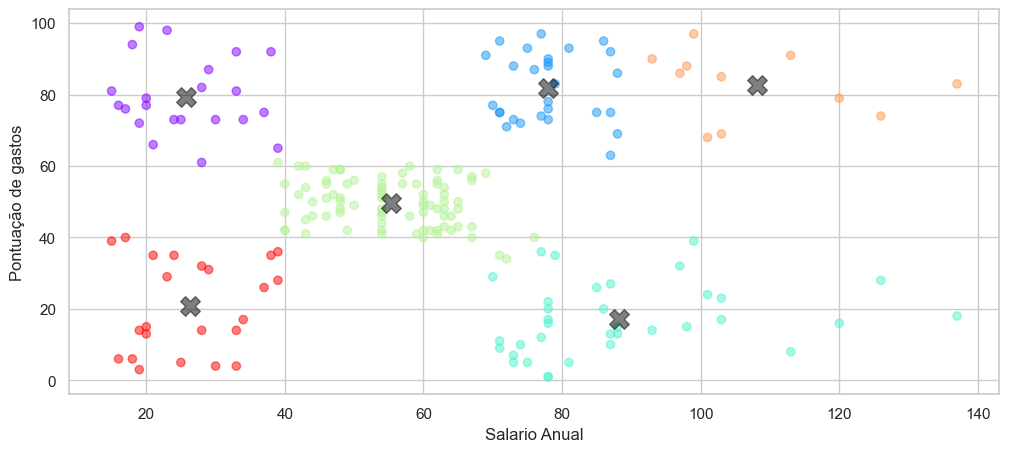

In [110]:
# Plotar os os grupos sem dados escalonados

plt.scatter(dados["Annual Income (k$)"],dados["Spending Score (1-100)"],c=kmeans_labels, alpha=0.5, cmap="rainbow")
plt.xlabel("Salario Anual")
plt.ylabel("Pontuação de gastos")

plt.scatter(centroides[:,0],centroides[:,1],c="black",marker="X",s=200,alpha=0.5)
plt.rcParams['figure.figsize'] = (12,5)
plt.show()

In [118]:
# Definir qtd de cluster 

k = list(range(1,10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Através da função optimal_number_of_clusters a melhor quantidade de cluster é 6


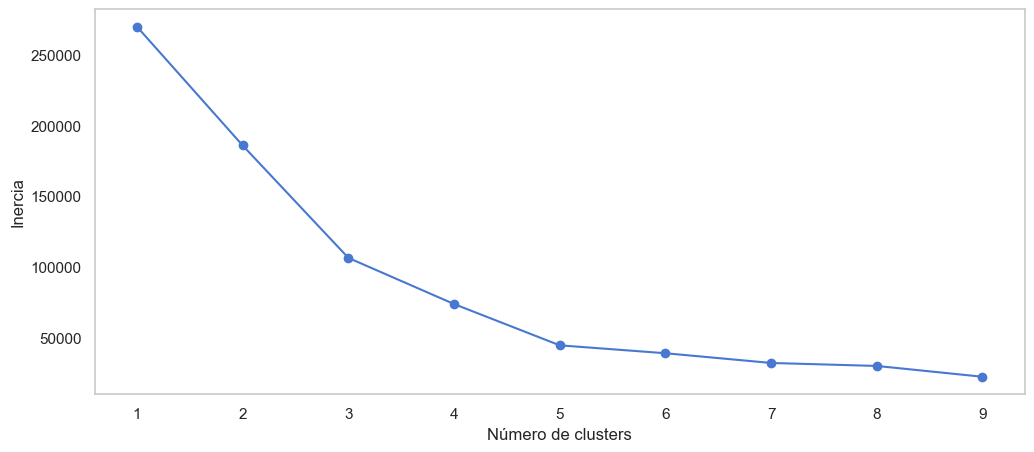

In [130]:
"""

# Apoio
# Como definir o número de clusters para o seu KMeans
# https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

"""

# Definir o melhor cluster --> Usar regra do cotovelo para selecionar o numero do cotovelo

# Armazenar o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido 
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[["Annual Income (k$)","Spending Score (1-100)"]])
    sse.append(kmeans.inertia_) # --> Calculo do erro do k-means (mudar o centroide dos dados)


# Funcao para escolher o melhor cluster
n = optimal_number_of_clusters(sse)
print(f"Através da função optimal_number_of_clusters a melhor quantidade de cluster é {n}")

# Plotar o grafico
plt.rcParams['figure.figsize'] = (12,5)
fig, ax = plt.subplots()
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inercia')
ax.grid(False)
plt.show()

In [126]:
# Agrupar os dados --> Grupo por Age 
dados.groupby("Grupos")["Age"].mean()

Grupos
0    25.272727
1    32.785714
2    41.114286
3    42.716049
4    32.454545
5    45.217391
Name: Age, dtype: float64

In [127]:
# Agrupar os dados --> Grupo por Age 
dados.groupby("Grupos")["Annual Income (k$)"].mean()


Grupos
0     25.727273
1     78.035714
2     88.200000
3     55.296296
4    108.181818
5     26.304348
Name: Annual Income (k$), dtype: float64

In [128]:
# Gerando novamente com o clusters 5

kmeans = KMeans(n_clusters=5,random_state=0, n_init=10) # Definindo os hiperparametros 

# Implementando o K-Means nos dados
kmeans.fit(dados[["Annual Income (k$)","Spending Score (1-100)"]])

# Salvando os centroides de cada cluster 
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[["Annual Income (k$)","Spending Score (1-100)"]])

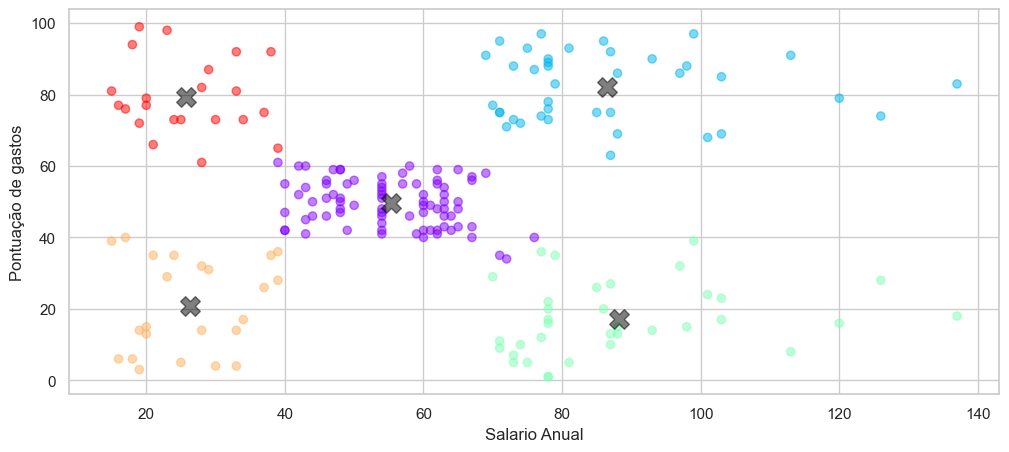

In [140]:
# Plotar os os grupos sem dados escalonados

plt.scatter(dados["Annual Income (k$)"],dados["Spending Score (1-100)"],c=kmeans_labels, alpha=0.5, cmap="rainbow")
plt.xlabel("Salario Anual")
plt.ylabel("Pontuação de gastos")

plt.scatter(centroides[:,0],centroides[:,1],c="black",marker="X",s=200,alpha=0.5)
plt.rcParams['figure.figsize'] = (12,5)
plt.show()

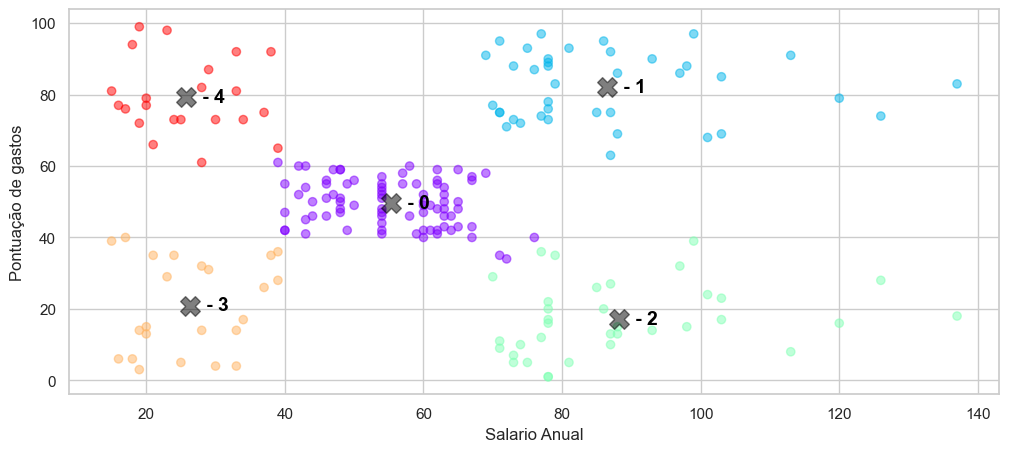

In [142]:
plt.scatter(dados["Annual Income (k$)"], dados["Spending Score (1-100)"], c=kmeans_labels, alpha=0.5, cmap="rainbow")
plt.xlabel("Salario Anual")
plt.ylabel("Pontuação de gastos")

# Plotar os centroides com X
plt.scatter(centroides[:,0], centroides[:,1], c="black", marker="X", s=200, alpha=0.5)

# Adicionar o número do grupo ao lado de cada centroide
for idx, (x, y) in enumerate(centroides):
    plt.text(x, y, f"   - {idx}", fontsize=14, fontweight='bold', color='black', va='center', ha='left')

plt.rcParams['figure.figsize'] = (12,5)
plt.show()

#### Aula 4 - Modelos Baseados em Árvores

#### Aula 5 - Validação Cruzada e Pipeline no Sklearn

#### Aula 6 - Classification Report e Métricas de Classificação

#### Aula 7 - AUC Score e ROC Curve